In [1]:
#Import Library yang di butuhkan di project ini
import pandas as pd 
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
#Untuk memanggil dataset
dataset= pd.read_csv("R01_students_performance.csv") 
dataset.head()

,Study Hours (X),Exam Scores (Y)
0,1.5,60
1,2.0,65
2,2.5,73
3,3.0,75
4,2.0,62


In [2]:
#Melihat Jumlah Dataset
print("#Jumlah dataset saya :"+str(len(dataset.index)))

#Jumlah dataset saya :50


In [3]:
dataset.describe()

,Study Hours (X),Exam Scores (Y)
count,50.000000,50.000000
mean,3.006000,76.480000
std,0.860567,11.051346
min,1.500000,58.000000
25%,2.300000,68.000000
50%,3.000000,75.500000
75%,3.700000,86.500000
max,4.500000,95.000000


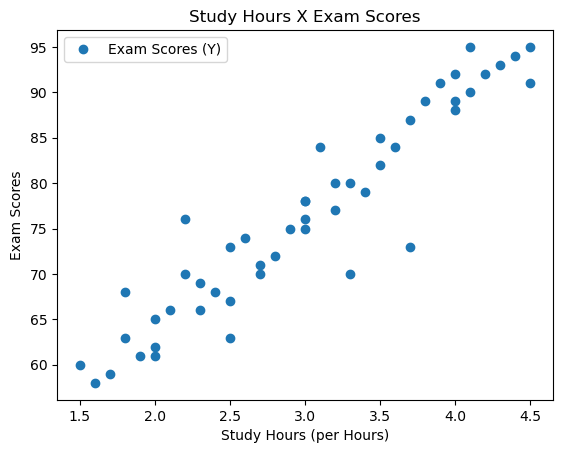

In [4]:
#Kode ini menggunakan metode plot dari objek pandas DataFrame (dataset). Ini membuat scatter plot dengan sumbu x sebagai "Study Hours (X)", sumbu y sebagai "Exam Scores (Y)", dan menggunakan simbol 'o' untuk menunjukkan titik-titik data.
dataset.plot(x='Study Hours (X)',y='Exam Scores (Y)',style='o')
#Ini menambahkan judul ke plot, yaitu 'Study Hours X Exam Scores'.
plt.title('Study Hours X Exam Scores')
#Kode ini menambahkan label pada sumbu x dan y untuk memberikan informasi lebih lanjut tentang data yang ditampilkan di plot.
plt.xlabel('Study Hours (per Hours)')
plt.ylabel('Exam Scores')
#menampilkan hasilnya
plt.show()

In [5]:
#digunakan untuk menghitung matriks korelasi antara semua pasangan variabel dalam dataset. 
dataset.corr()

,Study Hours (X),Exam Scores (Y)
Study Hours (X),1.000000,0.943875
Exam Scores (Y),0.943875,1.000000


In [6]:
#Ini mengambil semua baris (:) dari dataset dan semua kolom kecuali kolom terakhir (:-1). Dengan kata lain, ini mengambil fitur dari dataset.
#Ini mengambil semua baris (:) dari dataset dan hanya kolom dengan indeks 1 ([:, 1]). Dengan kata lain, ini mengambil target atau variabel dependen dari dataset.
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

In [7]:
#Melatih data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
#Membuat Model Objek
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [9]:
print(regressor.intercept_)

40.29808524968731


In [10]:
print(regressor.coef_)

[12.00391289]


In [11]:
#perhitungan manual dengan rumus : y =m intercept + coef * Study Hours
40.29808524968731 + 12.00391289 * 1.5

58.30395458468731

In [12]:
y_pred = regressor.predict(x_test)

In [13]:
dataframe = pd.DataFrame({'Data Sebenarnya': y_test, 'Data Prediksi': y_pred})
dataframe

,Data Sebenarnya,Data Prediksi
0,70,66.706694
1,80,78.710606
2,70,72.708650
3,89,88.313737
4,73,70.307867
5,84,83.512172
6,61,64.305911
7,74,71.508259
8,87,84.712563
9,62,64.305911


D:\Andryan\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


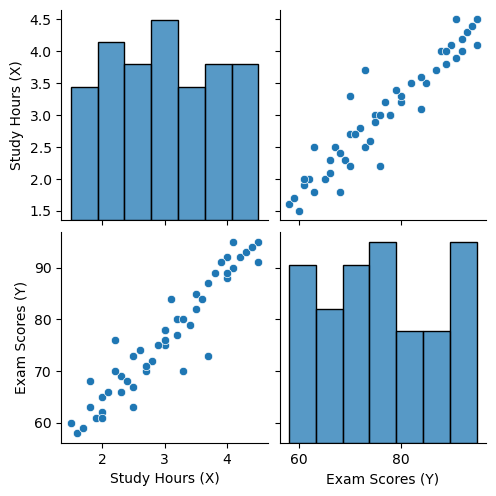

In [14]:
#membuat pair plot dari dataset.
sns.pairplot(dataset)

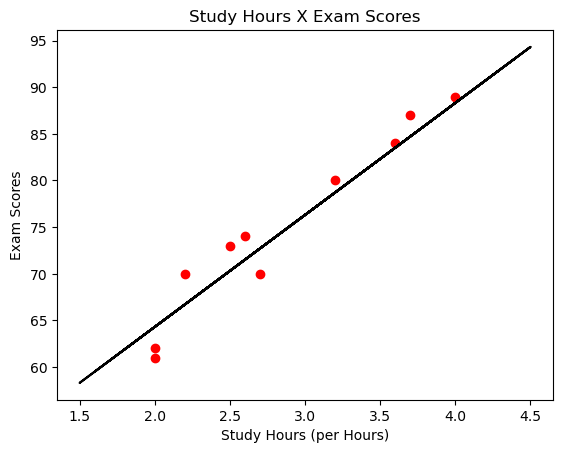

In [15]:
#Memvisualisasikan hasil Test set
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'black')
plt.title('Study Hours X Exam Scores')
plt.xlabel('Study Hours (per Hours)')
plt.ylabel('Exam Scores')
plt.show()

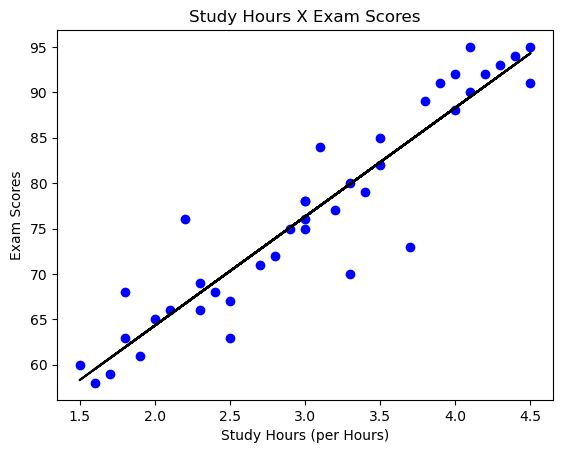

In [16]:
#Memvisualisasikan hasil Training set
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, regressor.predict(x_train), color = 'black')
plt.title('Study Hours X Exam Scores')
plt.xlabel('Study Hours (per Hours)')
plt.ylabel('Exam Scores')
plt.show()